<a href="https://colab.research.google.com/github/GilbertHD/HD2103/blob/main/HD_08_02_FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

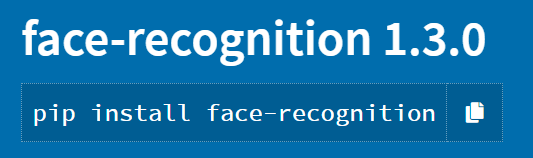 

https://pypi.org/project/face-recognition/

https://levelup.gitconnected.com/face-recognition-system-using-google-colab-ccca1d56f5f3

In [ ]:
!mkdir known
!wget https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg -O known/elon.jpg
!wget https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg -O known/bill.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Mark_Zuckerberg_F8_2019_Keynote_%2832830578717%29_%28cropped%29.jpg/220px-Mark_Zuckerberg_F8_2019_Keynote_%2832830578717%29_%28cropped%29.jpg -O known/mark.jpg

In [ ]:
!mkdir unknown
!wget https://s.yimg.com/ny/api/res/1.2/nQ7A7Z3Cdl0lLaak2a73bA--/YXBwaWQ9aGlnaGxhbmRlcjt3PTk2MDtoPTY2Ny41/https://s.yimg.com/uu/api/res/1.2/ZwRHankdD8XGvdKsdIgNMw--~B/aD0xMzM1O3c9MTkyMDthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/gobankingrates_644/f1bdb5e4189661df2b6b7b2c90ab9dfa -O unknown/1.jpg
!wget  https://upload.wikimedia.org/wikipedia/commons/a/a0/Bill_Gates_2018.jpg -O unknown/2.jpg
!wget https://cdn.theatlantic.com/thumbor/UCXrWHURaKz3OyasLkI1pp20YF4=/0x220:4224x2596/720x405/media/img/mt/2019/10/RTS2RLOT/original.jpg -O unknown/3.jpg

mkdir: cannot create directory ‘unknown’: File exists
--2021-03-10 05:45:38--  https://s.yimg.com/ny/api/res/1.2/nQ7A7Z3Cdl0lLaak2a73bA--/YXBwaWQ9aGlnaGxhbmRlcjt3PTk2MDtoPTY2Ny41/https://s.yimg.com/uu/api/res/1.2/ZwRHankdD8XGvdKsdIgNMw--~B/aD0xMzM1O3c9MTkyMDthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/gobankingrates_644/f1bdb5e4189661df2b6b7b2c90ab9dfa
Resolving s.yimg.com (s.yimg.com)... 69.147.92.11, 69.147.92.12, 2001:4998:14:800::1000, ...
Connecting to s.yimg.com (s.yimg.com)|69.147.92.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69039 (67K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]  67.42K  --.-KB/s    in 0.03s   

2021-03-10 05:45:38 (2.51 MB/s) - ‘unknown/1.jpg’ saved [69039/69039]

--2021-03-10 05:45:38--  https://upload.wikimedia.org/wikipedia/commons/a/a0/Bill_Gates_2018.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikim

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 84kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=8e3fe0a6b307720df928019045075b00ff1cc4ff6a64dfd03f4873955875e660
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition   ##Detecting and recogniting faces
import cv2     ## intracting with images
import os       ## For Reading the file name
from google.colab.patches import cv2_imshow ## we are importing cv2_imshow from google.colab.patches because google colab doesn't support cv2.imshow() funciton.

In [ ]:
def read_img(path):
   img = cv2.imread(path) ## reading image
   (h,w) = img.shape[:2]  ## fetching height and width
   width = 500            ## hard coding width
   ratio = width / float(w) ## preparing a ration for height
   height = int(h * ratio)  ## generating new height
   return cv2.resize(img,(width,height)) ##return the reshaped image

In [ ]:
known_encodings = [] 
known_names = []
known_dir = 'known' ##Known directory path
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file) ##Reading all the images
  img_enc = face_recognition.face_encodings(img)[0] ##face encodings
  known_encodings.append(img_enc) 
  known_names.append(file.split('.')[0])
print(known_names) ## Printing all the known labels

In [ ]:
unknown_dir = 'unknown' ##UNknown Images Directory
for file in os.listdir(unknown_dir):
 print("Processing",file)
 img = read_img(unknown_dir + '/' + file)##reading images
 img_enc = face_recognition.face_encodings(img)[0]##Encodings
 results = face_recognition.compare_faces(known_encodings,img_enc)
 ##Comparing Known Encodings with Unknown encoding
 print(face_recognition.face_distance(known_encodings,img_enc))
 ## Printing Face Distances
 res = [i for i, val in enumerate(results) if val]
 name = known_names[res[0]]
 
 '''
Drawing a rectangle box around the faces of unknown images using  face_locations function in library
'''
 (top,right,bottom,left) = face_recognition.face_locations(img)[0]
 cv2.rectangle(img,(left,top),(right,bottom),(255,255,100),2)
 ##Drawing Rectangle
 cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,3, (100,0,255),2) ##Putting labels(names) on the rectangle
 cv2_imshow(img) ##showing images